**MA336: Artificial Intelligence and Machine Learning with Applications**

# **Gym Members Clustering Using AI**  
Segmenting Fitness Profiles with KMeans & Hierarchical Clustering   

This study uses AI clustering algorithms to assess gym members' physical, behavioral, and fitness characteristics.  We plan to find hidden trends within gym populations using  machine learning, enabling for more targeted health advice, individualized programs, and increased member engagement.

The dataset used for this analysis was obtained from kaggle.com (https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset) . It consists of 973 entries, each capturing critical information related to fitness levels and exercise habits:
	•	Demographics: Age, Gender, Height, Weight
	•	Cardiovascular Data: Max Heart Rate (BPM), Average BPM, Resting BPM
	•	Workout Details: Session Duration, Calories Burned, Workout Type, Weekly Frequency
	•	Health Metrics: Body Fat Percentage, BMI, Water Intake
	•	Experience Level: Classified from Beginner to Expert

This wide set of data allows for a thorough understanding of gym member activity, making it ideal for pattern discovery, member segmentation, and fitness progression analysis. The ultimate goal is to use clustering to group people with similar features and provide actionable insights to gym owners and health providers.



## Methods

### Objective

The goal of this study is to classify gym members into meaningful groups based on their physical traits, health markers, and exercise behaviors. By studying data trends, we can find separate groups of people who share similar characteristics. This segmentation enables fitness facilities to better understand their members, resulting in more personalized programs, targeted health suggestions, and increased overall engagement.

### Clustering Algorithms Used

####  **KMeans Clustering**

- The dataset is divided into *k* unique, non-overlapping groups by minimizing the distance between members and cluster centroids.
- Each gym member is placed to the closest cluster based on feature similarity.
- We chose **k = 3**, which corresponds to traditional gym categories: beginners, intermediates, and advanced persons.

**Why KMeans?**  
Fast and efficient for medium-to-large datasets  
Provides properly separate categories.  
Requires giving the number of clusters beforehand (k).  


#### **Hierarchical Clustering with Dendrogram**

- Iteratively merges related individuals or groups to create a layered cluster structure.
- A **dendrogram** is used to visualize the hierarchy of how clusters merge at various levels of similarity.
- The dendrogram helps determine the number of clusters by highlighting substantial gaps (we used three clusters for consistency).

**Why use hierarchical clustering?**  
The tool reveals layered links between members and allows for visual cluster selection.  


### Data Preprocessing

-- Selected 13 key characteristics capturing:  
   • Physical characteristics (e.g., age, weight, BMI) • Health indicators (e.g., heart rate, fat percentage)  
   • Exercise habits (e.g., workout frequency, calorie expenditure)  

- Standardized features using **StandardScaler** to ensure that all characteristics contribute equally and that features with greater numerical ranges are not dominating the clustering.


### Evaluation

Clustering efficiency is evaluated using the **Silhouette Score**, a statistic that indicates how well-separated and cohesive the clusters are.

- **+1** indicates strong, distinct clusters. - **0** indicates overlapping or unclear clusters. - **-1** indicates poor clustering and erroneous grouping.  

To confirm the results, we compare KMeans with Hierarchical Clustering using silhouette scores and visual plots (for example, pairplots, cluster-wise comparisons).


### Summary

Combining KMeans with standard Hierarchical Clustering provides:

Quick and scalable segmentation with KMeans  
Deeper structural knowledge using dendrograms.  
Effective gym member grouping to improve personalization, engagement, and health outcomes.  

In [29]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore", message=".*use_inf_as_na option is deprecated.*")


In [13]:
df = pd.read_csv("gym_members_exercise_tracking.csv")
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [14]:

# # Dataset Loading and Preliminary Analysis

df = pd.read_csv("gym_members_exercise_tracking.csv")

print("First 5 rows of the dataset:")
print(df.head())

# Descriptive statistics 
print("\nDescriptive Statistics:")
print(df.describe())

#Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

First 5 rows of the dataset:
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experi

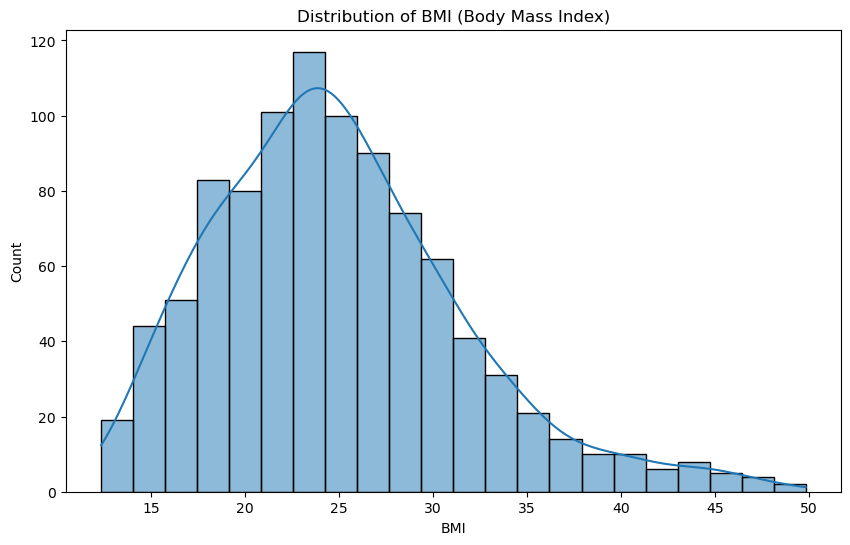

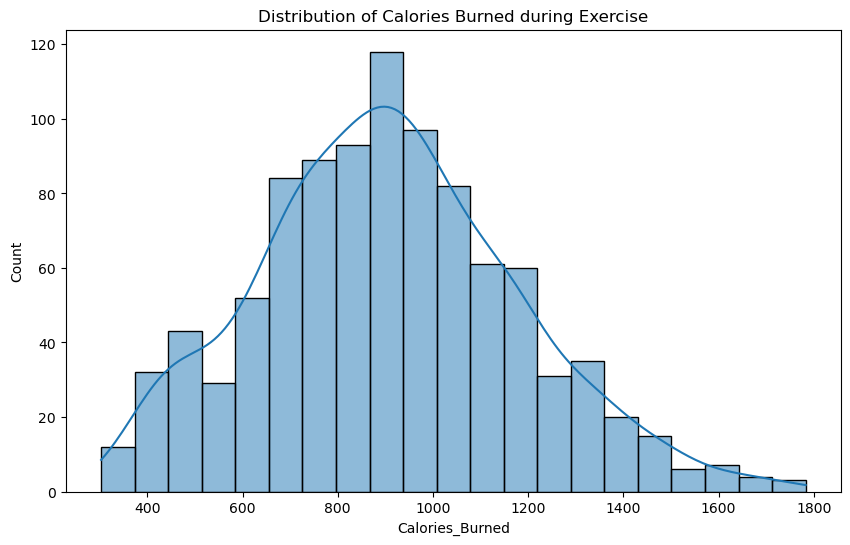

In [30]:
# Visualize distributions for key features
plt.figure(figsize=(10,6))
sns.histplot(df['BMI'], kde=True)
plt.title("Distribution of BMI (Body Mass Index)")
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['Calories_Burned'], kde=True)
plt.title("Distribution of Calories Burned during Exercise")
plt.show()

In [16]:
 # Feature Selection and Scaling
#Selecting relevant features that capture physical health, exercise patterns, and performance.
#Standardization is applied to ensure all features contribute equally to clustering, since they are measured in different units (e.g., BPM, kg, hours).
features = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
            'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)',
            'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# KMeans Clustering

#KMeans groups data by minimizing distances to cluster centers. We use k=3 based on domain knowledge.


from sklearn.cluster import KMeans

# Explicitly set n_init to suppress warning
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels


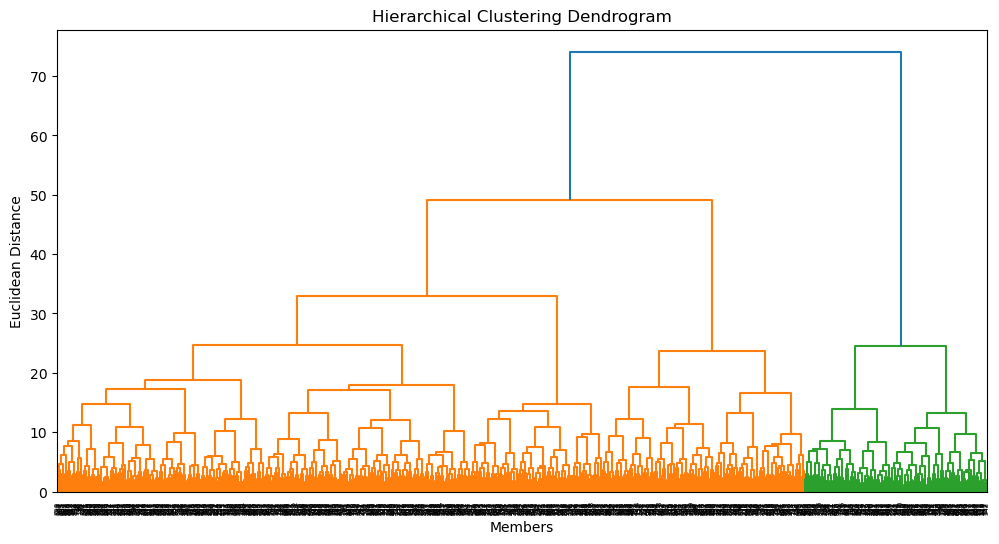

In [19]:
# Hierarchical Clustering Dendrogram
#Hierarchical clustering builds nested clusters.
#The dendrogram helps visualize member similarity and guide cluster selection.


linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Members")
plt.ylabel("Euclidean Distance")
plt.show()

In [24]:
# Form 3 clusters based on dendrogram
from scipy.cluster.hierarchy import fcluster

# Form 3 clusters based on dendrogram using 'maxclust' criterion
hier_labels = fcluster(linked, 3, criterion='maxclust')
df['Hierarchical_Cluster'] = hier_labels

## Results

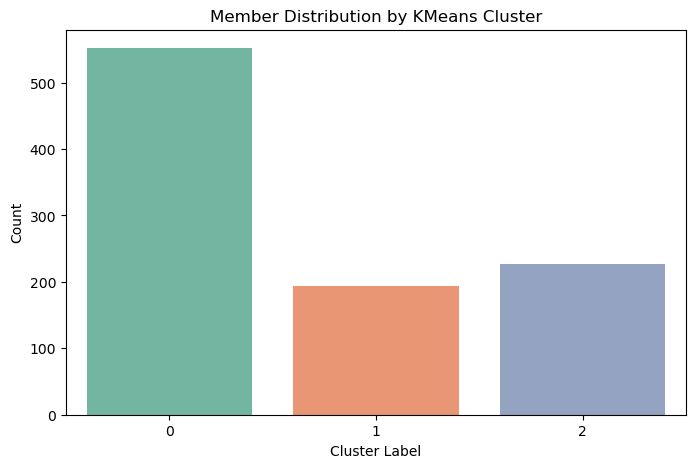

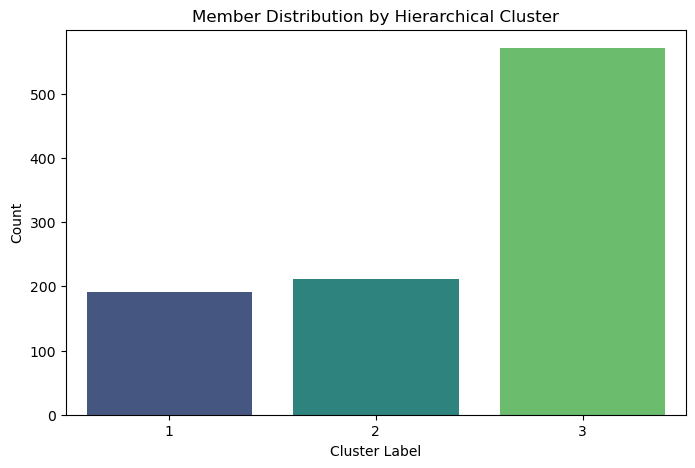

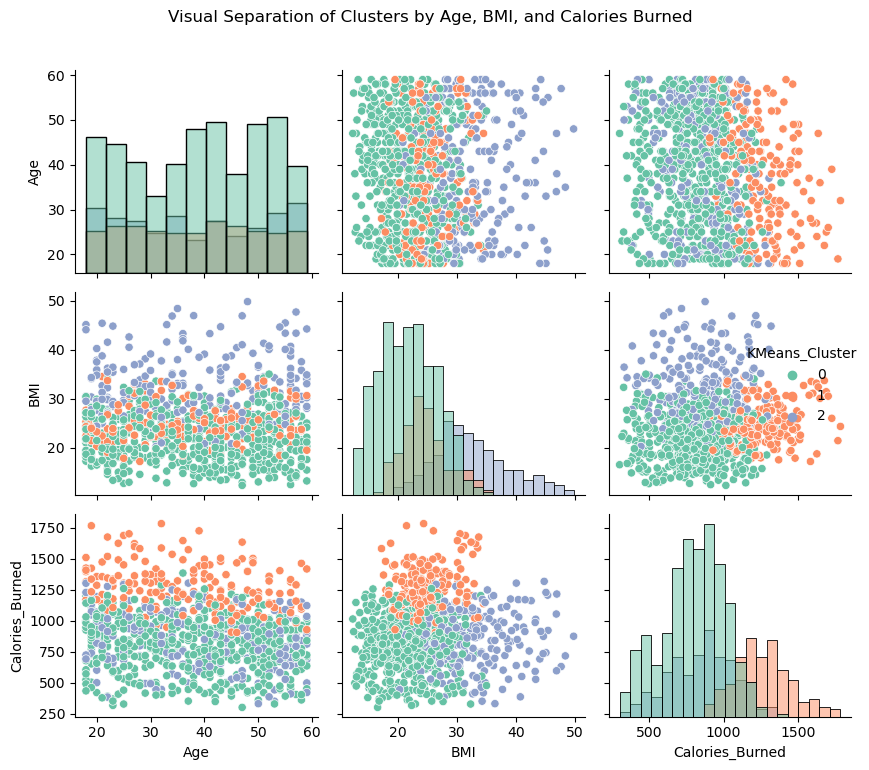

In [27]:
# Results Visualization 

# Barplot showing number of members per KMeans cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='KMeans_Cluster', data=df, palette='Set2')
plt.title("Member Distribution by KMeans Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Count")
plt.show()

# Barplot showing number of members per Hierarchical cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='Hierarchical_Cluster', data=df, palette='viridis')
plt.title("Member Distribution by Hierarchical Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Count")
plt.show()

# Pairplot to visualize how clusters differ across Age, BMI, and Calories Burned
sns.pairplot(df, vars=['Age', 'BMI', 'Calories_Burned'], hue='KMeans_Cluster', palette='Set2', diag_kind='hist')
plt.suptitle("Visual Separation of Clusters by Age, BMI, and Calories Burned", y=1.02)
plt.tight_layout()
plt.show()


KMeans Cluster Comparison:
                      Age        BMI  Calories_Burned  \
KMeans_Cluster                                          
0               38.847826  21.808967       800.208333   
1               38.226804  24.692010      1263.149485   
2               38.674009  32.646256       855.550661   

                Workout_Frequency (days/week)  Fat_Percentage  
KMeans_Cluster                                                 
0                                    3.045290       28.489855  
1                                    4.525773       14.900515  
2                                    2.964758       25.045374  

Hierarchical Cluster Comparison:
                            Age        BMI  Calories_Burned  \
Hierarchical_Cluster                                          
1                     38.214660  24.776545      1267.654450   
2                     37.203791  31.926351       837.398104   
3                     39.387040  22.365534       809.392294   

                

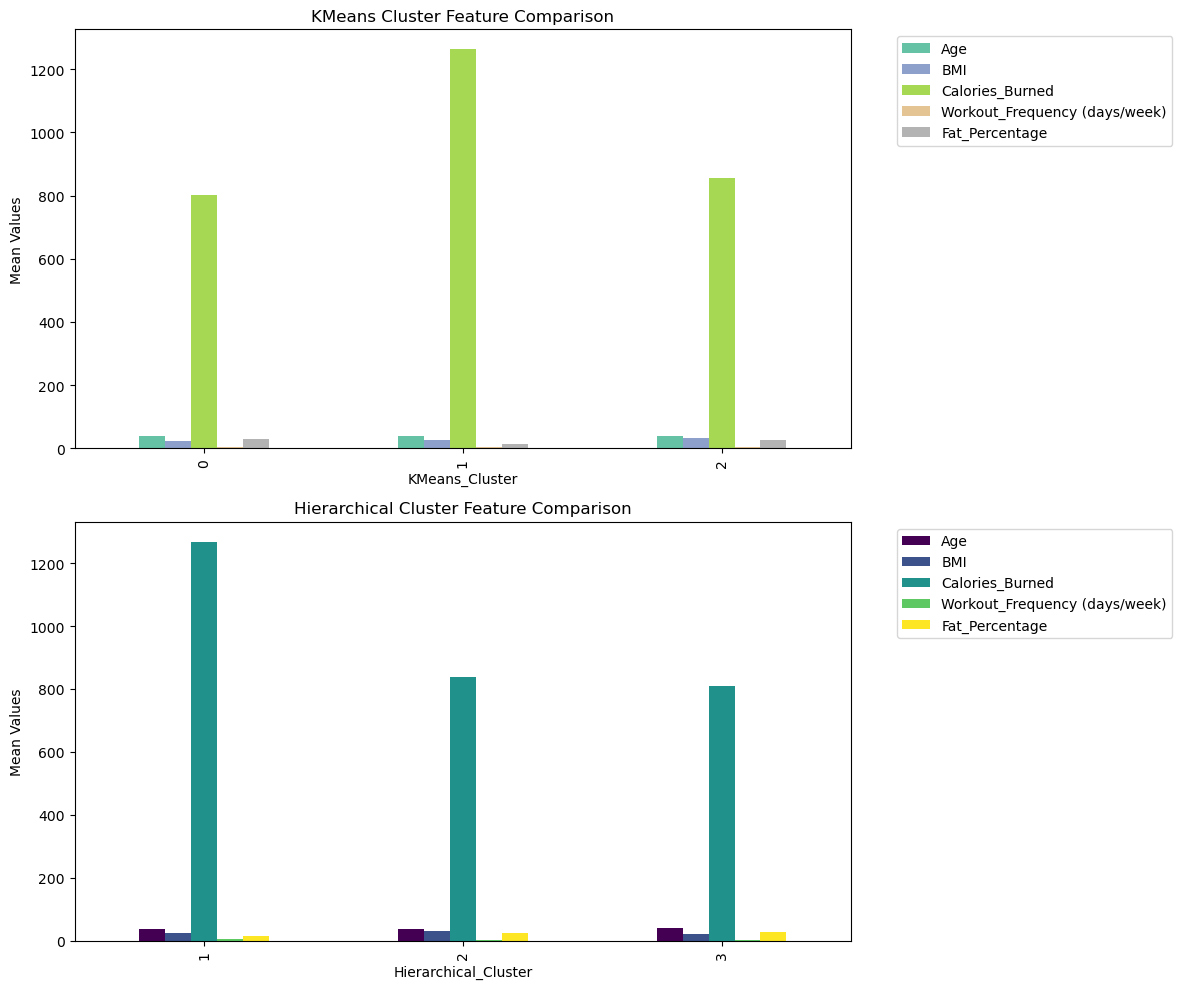

In [28]:
# Cluster Comparison: Understanding the Groups

#We compare the mean values of key features across clusters to identify distinct characteristics
#of each group, providing actionable insights for gyms.


# Select features to compare
compare_features = ['Age', 'BMI', 'Calories_Burned', 'Workout_Frequency (days/week)', 'Fat_Percentage']

# KMeans Cluster Comparison
print("\nKMeans Cluster Comparison:")
kmeans_means = df.groupby('KMeans_Cluster')[compare_features].mean()
print(kmeans_means)

# Hierarchical Cluster Comparison
print("\nHierarchical Cluster Comparison:")
hier_means = df.groupby('Hierarchical_Cluster')[compare_features].mean()
print(hier_means)

# Visualizing Cluster Means with Barplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# KMeans barplot
kmeans_means.plot(kind='bar', ax=axes[0], colormap='Set2')
axes[0].set_title("KMeans Cluster Feature Comparison")
axes[0].set_ylabel("Mean Values")
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Hierarchical barplot
hier_means.plot(kind='bar', ax=axes[1], colormap='viridis')
axes[1].set_title("Hierarchical Cluster Feature Comparison")
axes[1].set_ylabel("Mean Values")
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Conclusion & Real-World Gym Implications

Both **KMeans** and **Hierarchical Clustering** successfully divided gym members into three groups, offering useful insights for personalised training plans.

---

### ⚖ Pros & Cons of Methods
**KMeans Clustering**.  
Efficient and scaleable for huge gym datasets.  
Provides clear and unmistakable group separation.  
Pre-select the number of clusters (k).  
sensitive to the initial centroid placement.  

**Hierarchical Clustering**.  
reveals natural and nested structures in the data.  
Dendrogram provides intuitive cluster selection.  
Computationally intensive for larger datasets.  
It can be difficult to scale for operational use. 

### Key Group Insights (Based on Cluster Analysis)

**Cluster 0** - Beginners are likely to have a higher BMI, fewer workout sessions per week, and lower calorie burn. *Recommendation: Offer onboarding, motivational programs, and health-related interventions.  

**Cluster 1**: Intermediate Members - Balanced BMI and moderate workout frequency - Average fat percentage and calorie burn.  
*Recommendation*: Maintain general exercise routines and encourage regularity.  

**Cluster 2**: Advanced Athletes - Lower fat percentage - Increased workout frequency and calorie burn - Lower BMI, indicating improved body composition  
*Recommendation*: Provide performance-based planning, individualized coaching, and competitive programs.  

---

### Final Thoughts

- By utilizing clustering, gyms may adapt member experiences based on actual health and behavior patterns.  
Data-driven segmentation enables management to optimize retention and satisfaction.  
   Implement focused health interventions.  
   Create tiered programs for beginner, moderate, and advanced athletes.  

**Clustering converts raw member data into meaningful insights, enabling gyms to promote healthier, more engaged communities while increasing operational efficiency.**